In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=9d8fd41a9482f215d350706f2ff44e0ae19e7cad6545f99f351cafa69710f89f
  Stored in directory: /Users/garycastle/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = df[["koi_impact","koi_time0bk","koi_period","koi_slogg","koi_depth","koi_prad","koi_insol","koi_model_snr","koi_tce_plnt_num","koi_steff"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
y = df["koi_disposition"].values.reshape(-1, 1)
#X = df[["koi_period","koi_impact"]]

y = df["koi_disposition"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
6122,0.150,133.077240,6.768901,4.327,123.1,1.24,253.30,10.8,1,5737
6370,0.291,132.020050,0.733726,4.578,114.6,0.86,2891.64,13.8,1,5855
2879,0.970,134.460380,7.652707,4.481,641.1,3.21,226.81,254.3,1,6328
107,0.300,174.662240,7.953547,4.536,875.4,2.25,55.37,38.4,1,4768
29,0.831,172.258529,4.959319,4.359,9802.0,12.21,349.40,696.5,1,5712


In [11]:
X2 = df.drop(columns=["koi_disposition"])

In [12]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=23)

In [13]:

X2_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
243,0,0,0,0,5.714624,0.000033,-0.000033,132.638660,0.004320,-0.004320,...,-80,4.365,0.132,-0.096,1.013,0.141,-0.141,296.06424,45.976841,15.596
5885,0,1,0,0,27.308150,0.000004,-0.000004,143.504361,0.000113,-0.000113,...,-163,4.574,0.064,-0.096,0.739,0.127,-0.068,291.37350,51.153381,15.529
3093,0,0,0,0,91.957230,0.005680,-0.005680,183.024800,0.065700,-0.065700,...,-79,4.114,0.182,-0.098,1.528,0.238,-0.327,289.90417,38.651371,14.876
2176,0,0,0,0,31.517795,0.000094,-0.000094,185.153300,0.002230,-0.002230,...,-91,4.144,0.195,-0.105,1.400,0.211,-0.316,297.27798,48.320332,12.848
974,0,0,0,0,32.773763,0.000179,-0.000179,151.443520,0.004630,-0.004630,...,-76,4.076,0.203,-0.087,1.534,0.240,-0.360,290.88232,43.471760,14.758


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [26]:

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X.shape

(6991, 10)

In [16]:
y.shape

(6991,)

In [21]:
X2_scaler = StandardScaler().fit(X2_train)

In [22]:
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

In [23]:
X2.shape

(6991, 40)

# Train the Model



In [27]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train_scaled,y_train)
model.fit(X,y)

SVC()

In [29]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5041007057028419
Testing Data Score: 0.4925629290617849


In [30]:

# create the second SVC model, try different kernels
model2 = SVC(kernel='linear')
# model2 = SVC(kernel='rbf')
model2.fit(X2_train_scaled,y_train)

SVC(kernel='linear')

In [31]:
print(f"Training Data Score: {model2.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X2_test_scaled, y_test)}")

Training Data Score: 0.8922372687392714
Testing Data Score: 0.8953089244851259


In [32]:

model3 = SVC(kernel='rbf')
model3.fit(X2_train_scaled,y_train)

SVC()

In [33]:
print(f"Training Data Score: {model3.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X2_test_scaled, y_test)}")

Training Data Score: 0.8863246233072668
Testing Data Score: 0.8792906178489702


In [34]:
model4 = SVC(kernel='poly')
model4.fit(X2_train_scaled,y_train)

SVC(kernel='poly')

In [35]:
print(f"Training Data Score: {model4.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model4.score(X2_test_scaled, y_test)}")

Training Data Score: 0.8058363532328819
Testing Data Score: 0.799771167048055


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [36]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [37]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.504, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.504, total=   1.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.504, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.504, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.504, total=   1.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.504, total=   1.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.504, total=   1.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.504, total=   1.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.504, total=   1.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.504, total=   1.5s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.503, total=   1.7s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.504, total=   1.4s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.504, total=   1.8s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.504, total=   1.4s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.504, total=   2.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.503, total=   2.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [38]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.5041005974428572


In [39]:

# train X2 with gridsearch
grid.fit(X2_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.685, total=   1.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.687, total=   1.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.689, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.678, total=   3.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.687, total=   3.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.835, total=   1.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.809, total=   1.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.819, total=   1.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.807, total=   1.6s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.873, total=   1.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.851, total=   1.6s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.864, total=   1.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.845, total=   1.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.860, total=   1.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.885, total=   0.7s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.871, total=   0.7s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [40]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.005}
0.8882303393271673


In [41]:
# model2
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [42]:
grid.fit(X2_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.894, total=   0.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.892, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.889, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.882, total=   1.4s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.880, total=   0.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.894, total=   0.6s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.892, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.889, total=   0.6s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.882, total=   1.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.891, total=   4.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.900, total=   5.5s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.889, total=   5.9s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.883, total=   5.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.879, total=   4.4s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.891, total=   4.3s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.900, total=   4.8s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.1min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [43]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.8889922427029742


In [44]:

# further refine model2
param_grid = {'C': [3, 5, 7],
              'gamma': [0.0001, 0.0002, 0.00009]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [45]:
grid.fit(X2_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=3, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=3, gamma=0.0001, score=0.894, total=   0.9s
[CV] C=3, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=3, gamma=0.0001, score=0.900, total=   1.0s
[CV] C=3, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ................... C=3, gamma=0.0001, score=0.888, total=   1.1s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.885, total=   1.6s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.882, total=   1.0s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.894, total=   0.8s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.900, total=   1.0s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.888, total=   1.0s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.885, total=   1.3s
[CV] C=3, gamma=0.0002 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.0min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [3, 5, 7], 'gamma': [0.0001, 0.0002, 9e-05]},
             verbose=3)

In [46]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 3, 'gamma': 0.0001}
0.8895645798615913


In [47]:
# further refine model2
param_grid = {'C': [0.1, 1, 2],
              'gamma': [0.0001, 0.0002, 0.00009]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [48]:
grid.fit(X2_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=0.1, gamma=0.0001, score=0.888, total=   0.4s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.877, total=   0.4s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.885, total=   0.4s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.872, total=   0.4s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.876, total=   0.6s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.888, total=   0.8s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.877, total=   0.5s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.885, total=   0.5s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.872, total=   0.3s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   29.2s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 2], 'gamma': [0.0001, 0.0002, 9e-05]},
             verbose=3)

In [49]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 2, 'gamma': 0.0001}
0.8888023126350797


In [50]:

# Make predictions with the hypertuned model
predictions = grid.predict(X2_test_scaled)

In [51]:

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE","FALSE POSITIVE","CONFIRMED"]))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.73      0.78       437
FALSE POSITIVE       0.78      0.86      0.81       450
     CONFIRMED       0.99      1.00      0.99       861

      accuracy                           0.90      1748
     macro avg       0.87      0.86      0.86      1748
  weighted avg       0.90      0.90      0.89      1748



In [52]:
# next try KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k: 1, Train/Test Score: 1.000/0.809
k: 3, Train/Test Score: 0.908/0.836
k: 5, Train/Test Score: 0.887/0.839
k: 7, Train/Test Score: 0.877/0.835
k: 9, Train/Test Score: 0.868/0.838
k: 11, Train/Test Score: 0.862/0.836
k: 13, Train/Test Score: 0.860/0.837
k: 15, Train/Test Score: 0.856/0.838
k: 17, Train/Test Score: 0.853/0.840
k: 19, Train/Test Score: 0.848/0.836
k: 21, Train/Test Score: 0.849/0.834
k: 23, Train/Test Score: 0.847/0.832
k: 25, Train/Test Score: 0.846/0.836
k: 27, Train/Test Score: 0.843/0.834
k: 29, Train/Test Score: 0.842/0.828


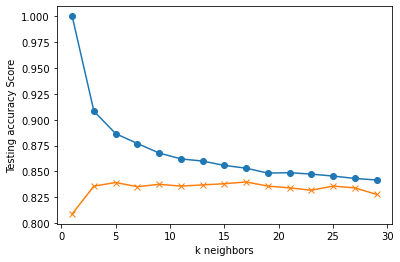

In [53]:

train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train_scaled, y_train)
    train_score = knn.score(X2_train_scaled, y_train)
    test_score = knn.score(X2_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X2_train, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X2_test, y_test))

k=17 Test Acc: 0.641


In [55]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X2_train, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X2_test, y_test))


k=23 Test Acc: 0.642


# Save the Model

In [60]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'gary_castillo.sav'
joblib.dump('model_1', filename)

['gary_castillo.sav']